### Importamos las librerias que vamos a necesitar

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from math import sqrt

### Time Series Regression - danceability

In [3]:
# abrimos nuestro dataset original
data = pd.read_csv("dataset/data.csv")

In [34]:
data.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [9]:
# dropeamos las columnas que no necesitamos
data_danz = data.drop(columns=["valence", "acousticness", "energy","instrumentalness","liveness","speechiness","artists","duration_ms","explicit","id","key","loudness","mode","name","popularity","release_date","tempo"])

In [35]:
data_danz.head(5)

,year,danceability
year,,
1921-01-01,1921-01-01,0.279
1921-01-01,1921-01-01,0.819
1921-01-01,1921-01-01,0.328
1921-01-01,1921-01-01,0.275
1921-01-01,1921-01-01,0.418


In [16]:
# Utilizmos la función datetime para hacer un time series
data_danz["year"]=pd.to_datetime(data_danz["year"], format='%Y', errors='ignore')
data_danz["year"]

0        1921-01-01
1        1921-01-01
2        1921-01-01
3        1921-01-01
4        1921-01-01
            ...    
170648   2020-01-01
170649   2020-01-01
170650   2020-01-01
170651   2020-01-01
170652   2020-01-01
Name: year, Length: 170653, dtype: datetime64[ns]

In [19]:
# Ponemos la serie temporal como índice
data_danz.index = data_danz["year"]
data_danz.head(5)

,year,danceability
year,,
1921-01-01,1921-01-01,0.279
1921-01-01,1921-01-01,0.819
1921-01-01,1921-01-01,0.328
1921-01-01,1921-01-01,0.275
1921-01-01,1921-01-01,0.418


In [22]:
### Dropeamos la columna year ya que la tenemos como índice
data_danz_s = data_danz.drop(columns=["year"])
data_danz_s

,danceability
year,
1921-01-01,0.279
1921-01-01,0.819
1921-01-01,0.328
1921-01-01,0.275
1921-01-01,0.418
...,...
2020-01-01,0.786
2020-01-01,0.717
2020-01-01,0.634


In [28]:
# hacemos un groupby por año y media
data_danz_s_m=data_danz_s.groupby(['year']).mean()

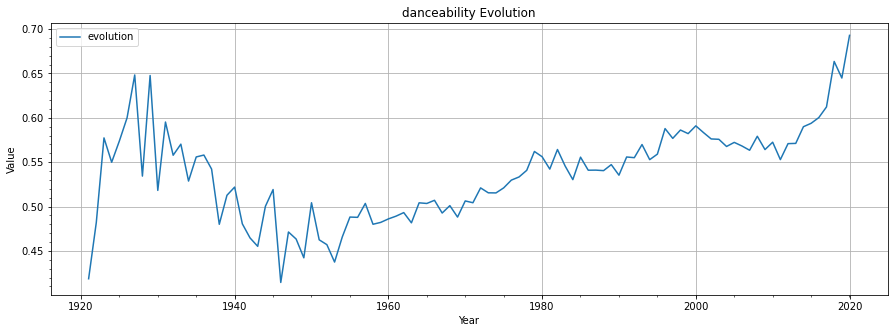

In [159]:
# hacemos un plot para ver la evolución de la variable
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(data_danz_s_m, label="evolution")
plt.xlabel('Year') 
plt.ylabel('Value')
plt.legend()
plt.title("danceability Evolution");

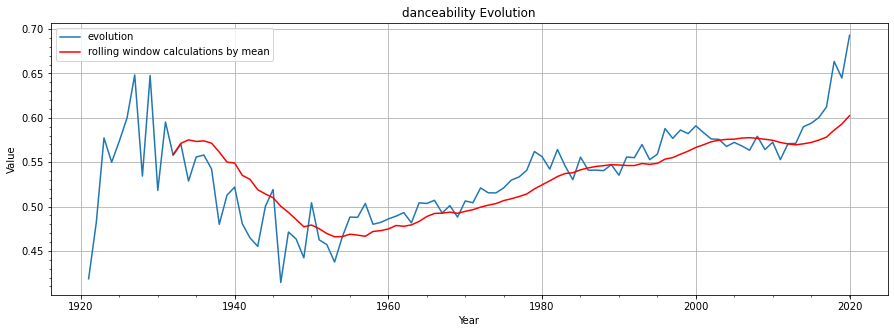

In [158]:
# hacemos un plot para ver la evolución de la variable con un rolling window calculations por la media
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(data_danz_s_m, label="evolution")
plt.plot(data_danz_s_m.rolling(window=12).mean(), c="r", label="rolling window calculations by mean")
plt.xlabel('Year') 
plt.ylabel('Value')
plt.legend()
plt.title("danceability Evolution");

In [151]:
# mediante la libreria statsmodels, hacemos un seasonal_decompose para separar la estacionalidad , tendencia y el resid
res = seasonal_decompose(data_danz_s_m, model="additive")

<Figure size 720x504 with 0 Axes>

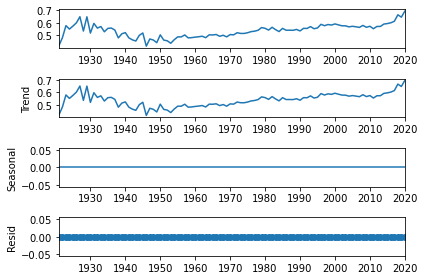

In [152]:
# lo graficamos
plt.figure(figsize=(10,7))
res.plot();

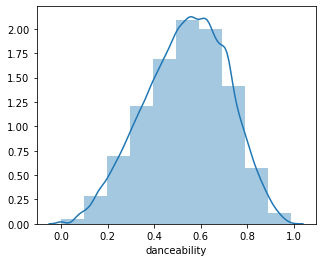

In [154]:
### hacemos un plot de la danzabilidad para ver su distribución y vemos que sigue una distribucion normal
plt.figure(figsize=(5,4))
sns.distplot(data_linear["danceability"], bins=10);

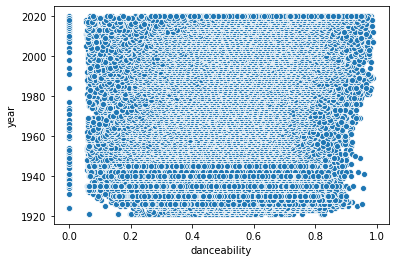

In [94]:
sns.scatterplot(x=data_linear["danceability"], y=data_linear["year"])

### Time Series Forecasting - ARIMA

In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [129]:
model = ARIMA(data_danz_s_m, order=(5,1,0))
model_fit = model.fit()

/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [130]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           danceability   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 212.740
Date:                Tue, 15 Dec 2020   AIC                           -413.479
Time:                        11:14:24   BIC                           -397.908
Sample:                    01-01-1921   HQIC                          -407.179
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5835      0.083     -7.062      0.000      -0.745      -0.422
ar.L2         -0.0145      0.092     -0.158      0.875      -0.195       0.166
ar.L3          0.1980      0.128      1.546      0.1

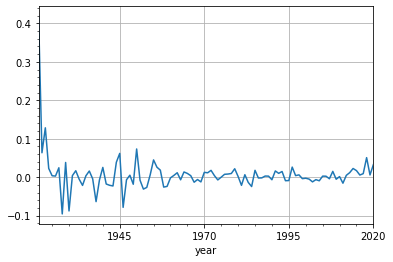

In [144]:
residuals = model_fit.resid
residuals.plot()
plt.grid()
plt.minorticks_on()
plt.show()

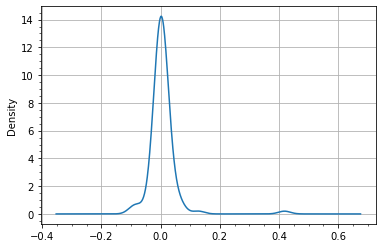

In [145]:
residuals.plot(kind='kde')
plt.grid()
plt.minorticks_on()
plt.show()

In [116]:
# hacemos un .describe para ver la media, desviación estándar
print(residuals.describe())

count    100.000000
mean       0.006972
std        0.050425
min       -0.095650
25%       -0.007248
50%        0.003595
75%        0.014747
max        0.418597
dtype: float64


### evaluate an ARIMA model using a walk-forward validation

In [117]:
# split into train and test sets
X = data_danz_s_m.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [118]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.542873, expected=0.541019
predicted=0.538634, expected=0.540459


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.544598, expected=0.547227
predicted=0.541893, expected=0.535299


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.540188, expected=0.555824
predicted=0.544896, expected=0.555065


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.553678, expected=0.569878
predicted=0.560167, expected=0.552830
predicted=0.566219, expected=0.559046
predicted=0.560870, expected=0.587831


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.571399, expected=0.576814
predicted=0.577722, expected=0.586212
predicted=0.584400, expected=0.582158
predicted=0.591785, expected=0.590918


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.587371, expected=0.583318
predicted=0.587986, expected=0.576160


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.582536, expected=0.575763
predicted=0.578136, expected=0.567680
predicted=0.570868, expected=0.572281
predicted=0.567182, expected=0.568230


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.568296, expected=0.563414
predicted=0.564945, expected=0.579193
predicted=0.569737, expected=0.564190
predicted=0.570641, expected=0.572488
predicted=0.568761, expected=0.552867
predicted=0.566695, expected=0.570882
predicted=0.559741, expected=0.571148
predicted=0.567127, expected=0.589948
predicted=0.575367, expected=0.593774
predicted=0.592154, expected=0.600202
predicted=0.600338, expected=0.612217
predicted=0.610513, expected=0.663500
predicted=0.637043, expected=0.644814
predicted=0.657494, expected=0.692904


### Evaluamos el forecast

In [150]:
# miramos el RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.015


### Hacemos el gráfico entre el forecast y el actual outcome

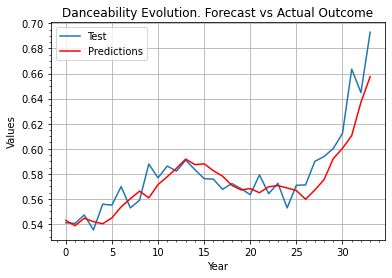

In [149]:
plt.plot(test, label="Test")
plt.plot(predictions, color='red', label="Predictions")
plt.grid()
plt.minorticks_on()
plt.xlabel('Year') 
plt.ylabel('Values')
plt.title("Danceability Evolution. Forecast vs Actual Outcome");
plt.legend()